# 🌿 NDVI-based Land Cover Classification

## 📥 Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

train = pd.read_csv('/kaggle/input/summer-analytics-mid-hackathon/hacktrain.csv')
test = pd.read_csv('/kaggle/input/summer-analytics-mid-hackathon/hacktest.csv')
#train = pd.read_csv('/content/hacktrain.csv')
#test = pd.read_csv('/content/hacktest.csv')
ndvi_cols = [col for col in train.columns if col.endswith('_N')]

## 📊 Basic Exploration

In [2]:
train.describe()

,Unnamed: 0,ID,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
count,8000.000000,8000.000000,7440.000000,6800.000000,7200.000000,7040.000000,7520.000000,6880.000000,7280.000000,6640.000000,...,7520.000000,7280.000000,7120.000000,6240.000000,7360.000000,6880.000000,6560.000000,7440.000000,6800.000000,7600.000000
mean,4984.202625,4985.202625,5845.476916,4868.091395,4469.837748,5193.485086,2927.586705,4924.493648,3313.881373,4987.520158,...,4872.681670,3674.886731,3012.178524,3055.167358,2041.316792,2799.820342,2144.360224,6259.064275,2629.203972,2578.449870
std,2900.022898,2900.022898,2261.409128,2758.499942,2876.218394,2510.389832,2728.325670,2600.418802,2434.828743,2674.963286,...,2776.135418,2331.105635,2068.334108,2209.985887,2040.354512,2452.563243,2267.606759,1825.563702,2386.147667,2436.270797
min,0.000000,1.000000,-433.735000,-1781.790000,-2939.740000,-1924.360000,-1794.870000,-1848.910000,-1574.970000,-2532.490000,...,-2683.600000,-1043.160000,-2435.900000,-1505.780000,-1445.370000,55.564100,-232.292000,-2729.430000,-2139.860000,-4145.250000
25%,2514.750000,2515.750000,4331.232500,2067.265000,1521.195000,3087.072500,500.515750,2398.385000,992.778250,2404.075000,...,2010.732500,1369.355000,1368.742500,1009.827500,419.987000,791.741250,501.602750,5938.257500,691.171500,689.199000
50%,4917.500000,4918.500000,6908.255000,5513.375000,4672.000000,5810.755000,1586.240000,5742.485000,2802.010000,5831.120000,...,5484.905000,3659.770000,2633.695000,2624.125000,1183.715000,1599.385000,969.711500,6941.010000,1521.210000,1439.950000
75%,7311.250000,7312.250000,7626.845000,7555.570000,7431.697500,7511.880000,5703.067500,7280.110000,5508.350000,7430.915000,...,7607.755000,5927.035000,4128.082500,4952.317500,3075.997500,4909.997500,3227.380000,7395.612500,4452.257500,4146.342500
max,10544.000000,10545.000000,8376.150000,8566.420000,8650.500000,8516.100000,8267.120000,8499.330000,8001.700000,8452.380000,...,8489.970000,7981.820000,8445.410000,7762.980000,8078.080000,8216.700000,8247.630000,8410.330000,8418.230000,8502.020000


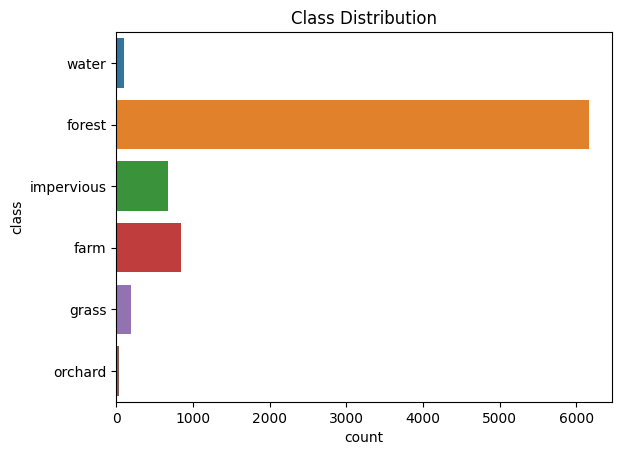

In [3]:
sns.countplot(y=train['class'])
plt.title('Class Distribution')
plt.show()

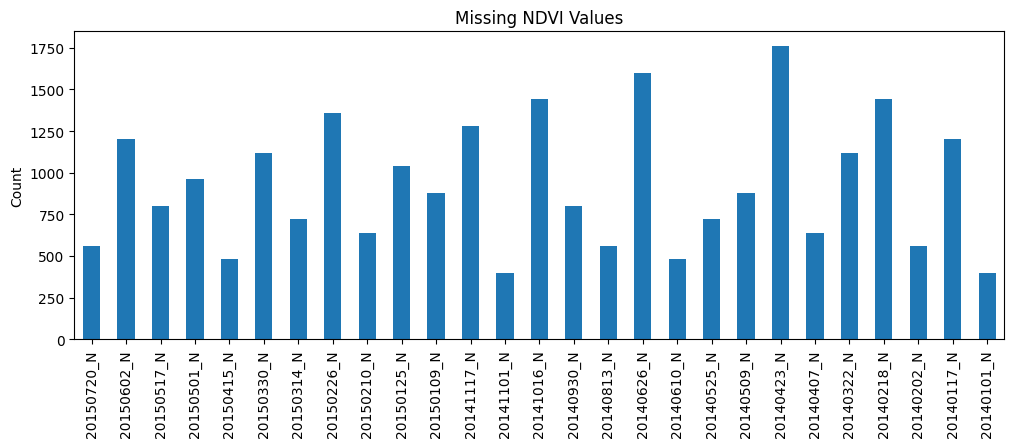

In [4]:
missing = train[ndvi_cols].isnull().sum()
missing[missing > 0].plot(kind='bar', figsize=(12, 4))
plt.title('Missing NDVI Values')
plt.ylabel('Count')
plt.show()

## ✨ Outlier Removal and Imputation

In [5]:
def remove_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df[col] = df[col].mask((df[col] < lower) | (df[col] > upper))
    return df

train = remove_outliers_iqr(train, ndvi_cols)
test = remove_outliers_iqr(test, ndvi_cols)

imputer = SimpleImputer(strategy='mean')
train[ndvi_cols] = imputer.fit_transform(train[ndvi_cols])
test[ndvi_cols] = imputer.transform(test[ndvi_cols])

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: Ru

## 🛠 Feature Engineering

In [6]:
def add_features(df):
    df['ndvi_mean'] = df[ndvi_cols].mean(axis=1)
    df['ndvi_std'] = df[ndvi_cols].std(axis=1)
    df['ndvi_min'] = df[ndvi_cols].min(axis=1)
    df['ndvi_max'] = df[ndvi_cols].max(axis=1)
    df['ndvi_range'] = df['ndvi_max'] - df['ndvi_min']
    df['ndvi_median'] = df[ndvi_cols].median(axis=1)
    df['ndvi_skew'] = df[ndvi_cols].skew(axis=1)
    df['ndvi_kurt'] = df[ndvi_cols].kurtosis(axis=1)
    df['ndvi_diff1_mean'] = df[ndvi_cols].diff(axis=1).mean(axis=1)
    df['ndvi_diff2_mean'] = df[ndvi_cols].diff(axis=1, periods=2).mean(axis=1)
    df['ndvi_peak_pos'] = df[ndvi_cols].idxmax(axis=1).apply(lambda x: ndvi_cols.index(x))
    return df

train = add_features(train)
test = add_features(test)

## 🧪 Model Training

In [7]:
features = ndvi_cols + [
    'ndvi_mean', 'ndvi_std', 'ndvi_min', 'ndvi_max', 'ndvi_range',
    'ndvi_median', 'ndvi_skew', 'ndvi_kurt', 'ndvi_diff1_mean',
    'ndvi_diff2_mean', 'ndvi_peak_pos']

X = train[features]
y = train['class']
X_test_final = test[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test_final)

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000,
                   multi_class='multinomial')

## 📈 Evaluation

In [8]:
y_val_pred = model.predict(X_val)
print(classification_report(y_val, y_val_pred))
print(confusion_matrix(y_val, y_val_pred))

              precision    recall  f1-score   support

        farm       0.60      0.71      0.65       168
      forest       0.98      0.83      0.90      1232
       grass       0.34      0.74      0.46        39
  impervious       0.84      0.84      0.84       134
     orchard       0.06      0.83      0.11         6
       water       0.30      0.76      0.43        21

    accuracy                           0.82      1600
   macro avg       0.52      0.79      0.57      1600
weighted avg       0.90      0.82      0.85      1600

[[ 120   14    9    7   10    8]
 [  69 1022   42    7   67   25]
 [   2    3   29    5    0    0]
 [   7    4    6  113    0    4]
 [   1    0    0    0    5    0]
 [   1    0    0    3    1   16]]


## 📤 Submission

In [9]:
y_test_pred = model.predict(X_test_scaled)
submission = pd.DataFrame({'ID': test['ID'], 'class': y_test_pred})
submission.to_csv('submission.csv', index=False)
#submission.to_csv('/kaggle/working/ultimate_submission.csv', index=False)